In [1]:
import numpy as np
from numpy.polynomial.hermite import hermval
import matplotlib.pyplot as plt
from P2_module import hermitian_eigensystem

# Anharmonic Oscillator

Hamiltonian is given by:

\begin{align}
    \hat{H}(\lambda) = \hat{H} + \lambda x^4 \\
    \hat{H}_0 = \frac{1}{2}(\hat{p}^2 + \hat{x}^2)
\end{align}

Wavefunction $\psi(n), \ket{n}$ is given by:

\begin{align}
    \psi_n(x) = (2^n n! \sqrt{\pi})^{-1/2}e^{-x^2/2}H_n(x) \\
    H_{n+1}(x) = 2xH(x) - 2nH_{n-1}(x) \\
    H_1(x) = 2x \\
    H_0 = 1
\end{align}

In [2]:
# My version of np.linalg.eig for the cases I am unable to use real_eigen
def my_np_linalg_eig(H):
    d, U = np.linalg.eig(H)

    # Sort eigenvalues and eigenvectors in non-decreasing order
    sorted_indices = np.argsort(d) 
    d = np.sort(d)
    U = U.T[sorted_indices].T

    return d, U

## 1. Anharmonic Oscillator Eigenvalues

n, m = 0, 1, 2, 3

\begin{align}
    \langle n|\hat x^2|m\rangle &=(n+1/2)\delta_{nm} + \tfrac{1}{2}\sqrt{(n+1)(n+2)}\,\delta_{n,m-2} + \tfrac{1}{2}\sqrt{(n-1)n\,}\,\delta_{n,m+2} \\
    \langle n|\hat p^2|m\rangle &=(n+1/2)\delta_{nm} - \tfrac{1}{2}\sqrt{(n+1)(n+2)}\,\delta_{n,m-2} - \tfrac{1}{2}\sqrt{(n-1)n\,}\,\delta_{n,m+2} \\
    \langle n|\hat x^4|m\rangle
    &= \tfrac{1}{4}\!\left(6n^2 + 6n + 3\right)\!\delta_{nm}
    + \sqrt{(n+1)(n+2)}\left(n+\tfrac{3}{2}\right)\!\delta_{n,m-2}\;+ \nonumber\\
    & + \sqrt{(n-1)n\,}\left(n-\tfrac{1}{2}\right)\!\delta_{n,m+2} +
    \tfrac{1}{4}\sqrt{(n+1)(n+2)(n+3)(n+4)}\,\delta_{n,m-4}\;+ \nonumber\\
    & + \tfrac{1}{4}\sqrt{(n-3)(n-2)(n-1)n\,}\,\delta_{n,m+4}.
\end{align}

In [3]:
# Function Definitions
def kron_del(n, m):
    if n == m: return 1.
    return 0.

def pos_term(n, m):
    return (n+0.5)*kron_del(n, m
            ) + 0.5*np.sqrt((n+1)*(n+2))*kron_del(n, m-2
            ) + 0.5*np.sqrt(n*(n-1))*kron_del(n, m+2)

def mom_term(n, m):
    return (n+0.5)*kron_del(n, m
            ) - 0.5*np.sqrt((n+1)*(n+2))*kron_del(n, m-2
            ) - 0.5*np.sqrt(n*(n-1))*kron_del(n, m+2)

def anharm_term(n, m):
    return 0.25*(6*n**2 + 6*n + 3)*kron_del(n, m
            ) + (n+1.5)*np.sqrt((n+1)*(n+2))*kron_del(n, m-2
            ) + (n-0.5)*np.sqrt((n)*(n-1))*kron_del(n, m+2
            ) + 0.25*np.sqrt((n+1)*(n+2)*(n+3)*(n+4))*kron_del(n, m-4
            ) + 0.25*np.sqrt(n*(n-1)*(n-2)*(n-3)*(n-4))*kron_del(n, m+4)

def anharm_osc_hamil_mat(num_states, lam_term):

    # Construct anharmonic oscillator hamiltonian matrix
    anharm_osc_hamil = np.zeros((num_states, num_states))

    # Poplulate elements
    for n in range(len(anharm_osc_hamil)):
        for m in range(len(anharm_osc_hamil)):
            anharm_osc_hamil[n, m] = 0.5*pos_term(n, m
                                    ) + 0.5*mom_term(n, m
                                    ) + lam_term*anharm_term(n, m)
    
    # Return matrix
    return anharm_osc_hamil

In [4]:
# Solve eigenvalue problem for a first 4 energy levels and fixed lambda
lambda_val = 1
num_states = 4

anharm_osc_hami = anharm_osc_hamil_mat(num_states, lambda_val)
e_val, e_vec = hermitian_eigensystem(anharm_osc_hami, 1e-5)
print(f'For the anharmonic oscillator with {num_states} states and lambda = {lambda_val}:')
print('Eigenvalues:', e_val)
print('Eigenvectors:\n', e_vec)

For the anharmonic oscillator with 4 states and lambda = 1:
Eigenvalues: [ 0.85508694  3.27383658 12.64491306 24.22616342]
Eigenvectors:
 [[-0.98310931  0.          0.18301937  0.        ]
 [ 0.         -0.95167372  0.          0.30711095]
 [ 0.18301937  0.          0.98310931  0.        ]
 [ 0.          0.30711095  0.          0.95167372]]


## 2. $E_n(\lambda)$ v/s $\lambda$ for 0 $\leq \lambda \leq$ 1

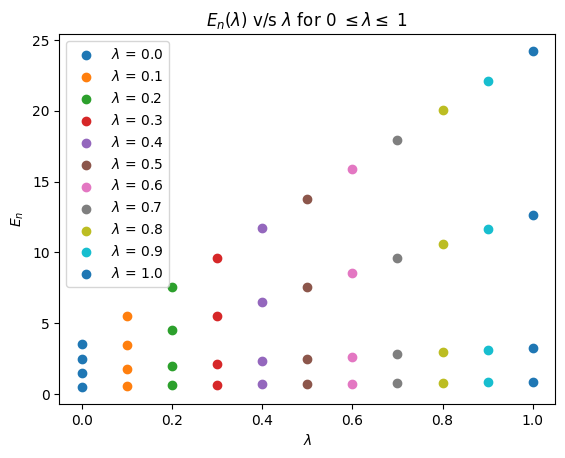

In [5]:
NUM_STATES = 4
lambda_vals = np.arange(0, 1.01, 0.1)

counter = 0
eigenvalues = []
for lambda_val in lambda_vals:
    anharm_osc_hami = anharm_osc_hamil_mat(NUM_STATES, lambda_val)
    eval, _ = hermitian_eigensystem(anharm_osc_hami, 1e-5)
    lambda_axis = [lambda_val, lambda_val, lambda_val, lambda_val]
    eigenvalues.append(eval)
    plt.scatter(lambda_axis, eigenvalues[counter],
                label=f'$\lambda$ = {round(lambda_val, 1)}')
    counter += 1

plt.xlabel('$\lambda$')
plt.ylabel('$E_{n}$')
plt.title('$E_n(\lambda)$ v/s $\lambda$ for 0 $\leq \lambda \leq$ 1')
plt.legend()

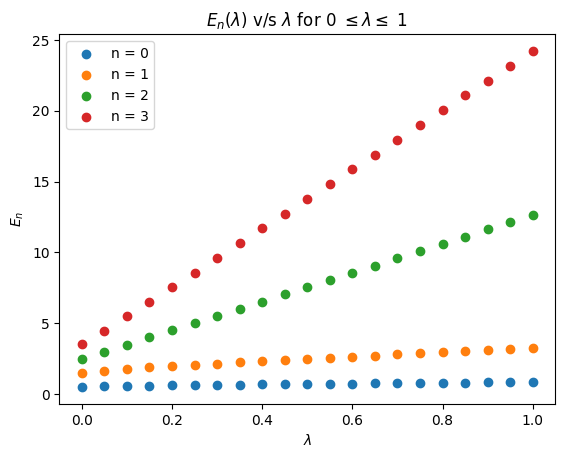

In [6]:
NUM_STATES = 4
lambda_vals = np.arange(0, 1.01, 0.05)

E_0 = []
E_1 = []
E_2 = []
E_3 = []

eigenvalues = []
for lambda_val in lambda_vals:
    anharm_osc_hami = anharm_osc_hamil_mat(NUM_STATES, lambda_val)
    eval, _ = hermitian_eigensystem(anharm_osc_hami, 1e-5)
    E_0.append(eval[0])
    E_1.append(eval[1])
    E_2.append(eval[2])
    E_3.append(eval[3])

plt.scatter(lambda_vals, E_0, label=f'n = 0')
plt.scatter(lambda_vals, E_1, label=f'n = 1')
plt.scatter(lambda_vals, E_2, label=f'n = 2')
plt.scatter(lambda_vals, E_3, label=f'n = 3')

plt.xlabel('$\lambda$')
plt.ylabel('$E_{n}$')
plt.title('$E_n(\lambda)$ v/s $\lambda$ for 0 $\leq \lambda \leq$ 1')
plt.legend()

Unfortunately, my code takes an unreasonable amount of time to run for n = 4, yet instantly gets a solution for n = 3. Hence, I am only able to provide graphs upto n = 3 with real_eigen and will have to use my_np_linalg_eig here.

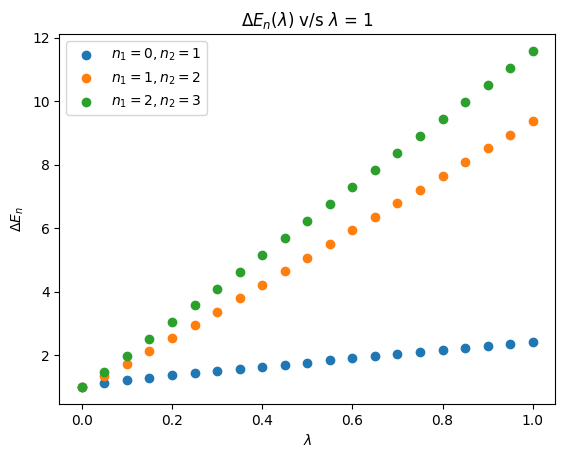

In [7]:
# Using real_eigen
del_E1 = np.array(E_1) - np.array(E_0)
del_E2 = np.array(E_2) - np.array(E_1)
del_E3 = np.array(E_3) - np.array(E_2)

plt.scatter(lambda_vals, del_E1, label=f'$n_1 = 0, n_2 = 1$')
plt.scatter(lambda_vals, del_E2, label=f'$n_1 = 1, n_2 = 2$')
plt.scatter(lambda_vals, del_E3, label=f'$n_1 = 2, n_2 = 3$')

plt.xlabel('$\lambda$')
plt.ylabel('$\Delta E_n$')
plt.title('$\Delta E_n(\lambda)$ v/s $\lambda$ = 1')
plt.legend()

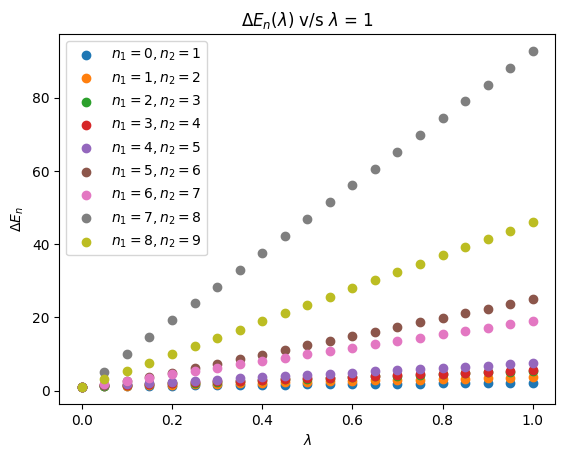

In [8]:
# Using my_np_linalg_eig
NUM_STATES = 10
lambda_vals = np.arange(0, 1.01, 0.05)

E_0 = []
E_1 = []
E_2 = []
E_3 = []
E_4 = []
E_5 = []
E_6 = []
E_7 = []
E_8 = []
E_9 = []

eigenvalues = []
for lambda_val in lambda_vals:
    anharm_osc_hami = anharm_osc_hamil_mat(NUM_STATES, lambda_val)
    eval, _ = my_np_linalg_eig(anharm_osc_hami)
    E_0.append(eval[0])
    E_1.append(eval[1])
    E_2.append(eval[2])
    E_3.append(eval[3])
    E_4.append(eval[4])
    E_5.append(eval[5])
    E_6.append(eval[6])
    E_7.append(eval[7])
    E_8.append(eval[8])
    E_9.append(eval[9])

del_E1 = np.array(E_1) - np.array(E_0)
del_E2 = np.array(E_2) - np.array(E_1)
del_E3 = np.array(E_3) - np.array(E_2)
del_E4 = np.array(E_4) - np.array(E_3)
del_E5 = np.array(E_5) - np.array(E_4)
del_E6 = np.array(E_6) - np.array(E_5)
del_E7 = np.array(E_7) - np.array(E_6)
del_E8 = np.array(E_8) - np.array(E_7)
del_E9 = np.array(E_9) - np.array(E_8)

plt.scatter(lambda_vals, del_E1, label=f'$n_1 = 0, n_2 = 1$')
plt.scatter(lambda_vals, del_E2, label=f'$n_1 = 1, n_2 = 2$')
plt.scatter(lambda_vals, del_E3, label=f'$n_1 = 2, n_2 = 3$')
plt.scatter(lambda_vals, del_E4, label=f'$n_1 = 3, n_2 = 4$')
plt.scatter(lambda_vals, del_E5, label=f'$n_1 = 4, n_2 = 5$')
plt.scatter(lambda_vals, del_E6, label=f'$n_1 = 5, n_2 = 6$')
plt.scatter(lambda_vals, del_E7, label=f'$n_1 = 6, n_2 = 7$')
plt.scatter(lambda_vals, del_E8, label=f'$n_1 = 7, n_2 = 8$')
plt.scatter(lambda_vals, del_E9, label=f'$n_1 = 8, n_2 = 9$')

plt.xlabel('$\lambda$')
plt.ylabel('$\Delta E_n$')
plt.title('$\Delta E_n(\lambda)$ v/s $\lambda$ = 1')
plt.legend()

## 3. Convergence of Method

Again, I will be unable to show convergence of this method for the reasons stated in the previos section. I will only be able to show plots upto n = 3. Hence I will turn to using np.linalg.eig again.

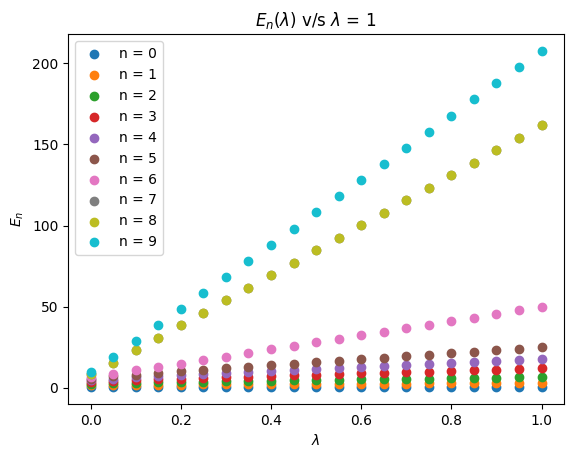

In [9]:
# Using my_np_linalg_eig
NUM_STATES = 10
lambda_vals = np.arange(0, 1.01, 0.05)

E_0 = []
E_1 = []
E_2 = []
E_3 = []
E_4 = []
E_5 = []
E_6 = []
E_7 = []
E_8 = []
E_9 = []

eigenvalues = []
for lambda_val in lambda_vals:
    anharm_osc_hami = anharm_osc_hamil_mat(NUM_STATES, lambda_val)
    eval, _ = my_np_linalg_eig(anharm_osc_hami)
    E_0.append(eval[0])
    E_1.append(eval[1])
    E_2.append(eval[2])
    E_3.append(eval[3])
    E_4.append(eval[4])
    E_5.append(eval[5])
    E_6.append(eval[6])
    E_7.append(eval[7])
    E_8.append(eval[8])
    E_9.append(eval[9])

plt.scatter(lambda_vals, E_0, label=f'n = 0')
plt.scatter(lambda_vals, E_1, label=f'n = 1')
plt.scatter(lambda_vals, E_2, label=f'n = 2')
plt.scatter(lambda_vals, E_3, label=f'n = 3')
plt.scatter(lambda_vals, E_4, label=f'n = 4')
plt.scatter(lambda_vals, E_5, label=f'n = 5')
plt.scatter(lambda_vals, E_6, label=f'n = 6')
plt.scatter(lambda_vals, E_8, label=f'n = 7')
plt.scatter(lambda_vals, E_8, label=f'n = 8')
plt.scatter(lambda_vals, E_9, label=f'n = 9')

plt.xlabel('$\lambda$')
plt.ylabel('$E_n$')
plt.title('$E_n(\lambda)$ v/s $\lambda$ = 1')
plt.legend()

## 4. First 4 Eigenfunctions $\psi_n(x)$ for $\lambda = 0$ and $\lambda = 1$

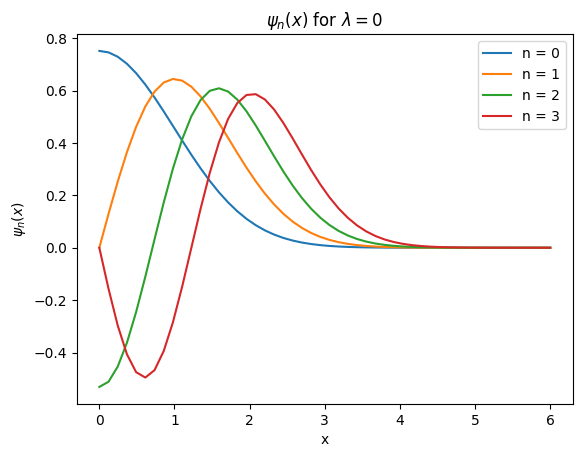

In [10]:
def hermite_poly(n, x):
    if n == 0: return 1
    elif n == 1: return 2*x
    elif n == 2: return 4*(x**2)-2
    elif n == 3: return (8*(np.power(x, 3))-(12*x))
    else: return 'n must be either 0, 1, 2, or 3!'

# 1. lambda = 0
def psi0(n, x):
    return (((2**n)*np.math.factorial(n)*np.sqrt(np.pi))**(-0.5)
            )*np.exp(-0.5*(x**2))*hermite_poly(n, x)

# Could not figure out how to plot psi for lambda = 1 despote finding the solution...
x = np.linspace(0, 6)
plt.plot(x, psi0(0, x), label='n = 0')
plt.plot(x, psi0(1, x), label='n = 1')
plt.plot(x, psi0(2, x), label='n = 2')
plt.plot(x, psi0(3, x), label='n = 3')
plt.xlabel('x')
plt.ylabel(f'$\psi_n(x)$')
plt.title(f'$\psi_n(x)$ for $\lambda = 0$')
plt.legend()
plt.show()